In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [11]:
# Load the dataset
data_path = '/content/EastWestAirlines.xlsx'
data_sheet = pd.read_excel(data_path, sheet_name='data')

In [12]:
# Inspect the dataset
data_description = pd.read_excel(data_path, sheet_name='Description')
print("Dataset Description:\n", data_description.head())
print("Dataset Head:\n", data_sheet.head())

Dataset Description:
   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  
Dataset Head:
    ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1  

In [13]:
# Step 1: Data Preprocessing
# Handle missing values (e.g., fill with mean)
data_sheet.fillna(data_sheet.mean(), inplace=True)

In [14]:
# Drop irrelevant columns if needed (modify based on dataset)
# For example: 'ID' or non-numeric columns
data_processed = data_sheet.select_dtypes(include=[np.number])

In [15]:
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)

In [16]:
# Step 2: Exploratory Data Analysis (EDA)
# Pair plot or heatmap for visualization
print("Data description:\n", data_processed.describe())

Data description:
                ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000  

In [17]:
# Step 3: Implementing Clustering Algorithms
# K-Means Clustering
k_values = range(2, 10)
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

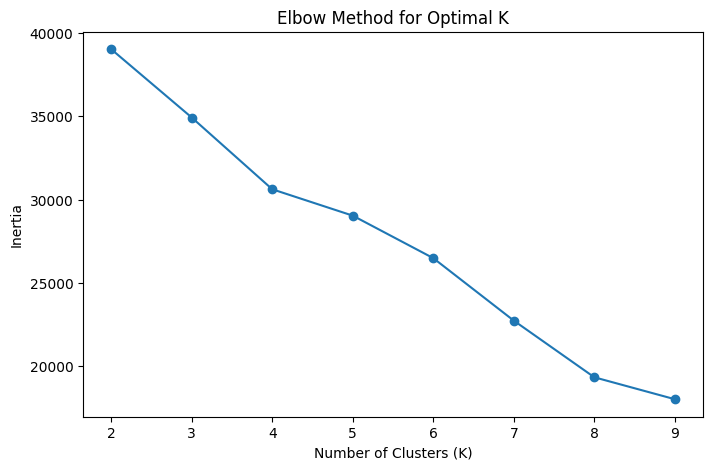

In [18]:
# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


Silhouette Score for K-Means: 0.201891717665419


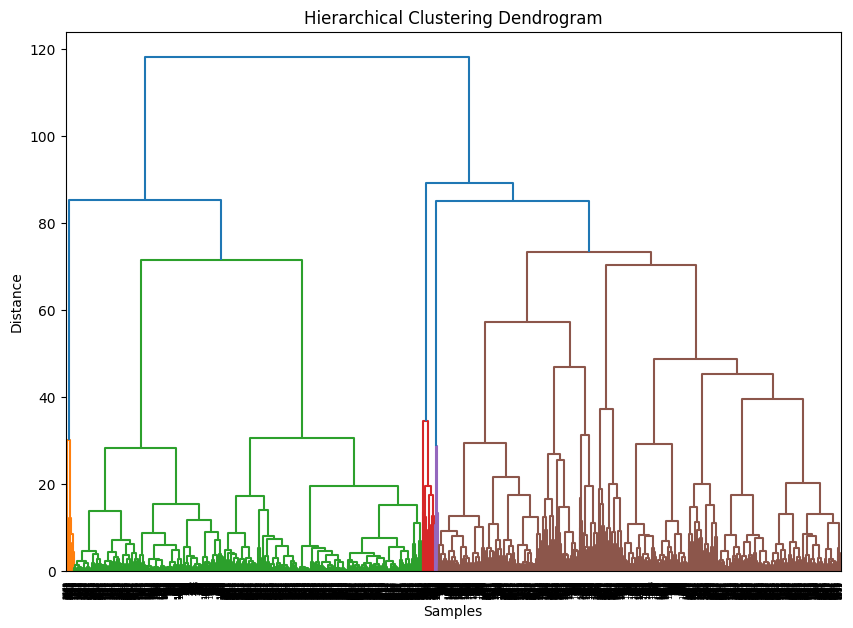

In [19]:
# Optimal K (e.g., from elbow)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
print("Silhouette Score for K-Means:", silhouette_score(data_scaled, kmeans_labels))

# Hierarchical Clustering
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [20]:
# Cut the dendrogram for clusters
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)


Silhouette Score for DBSCAN: -0.2823258834687895


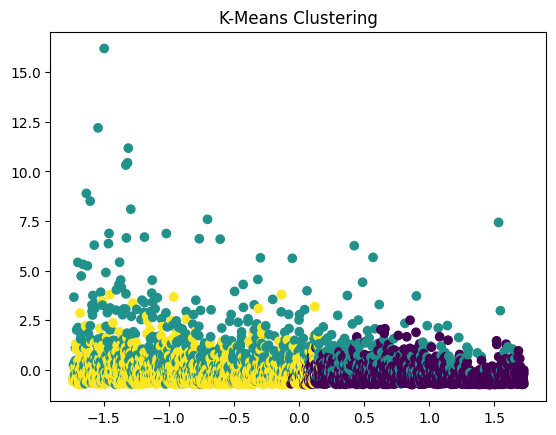

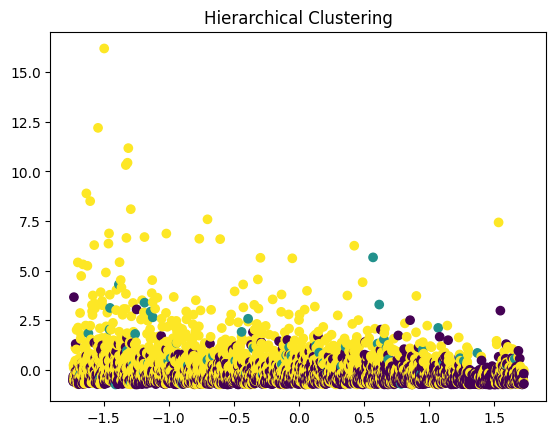

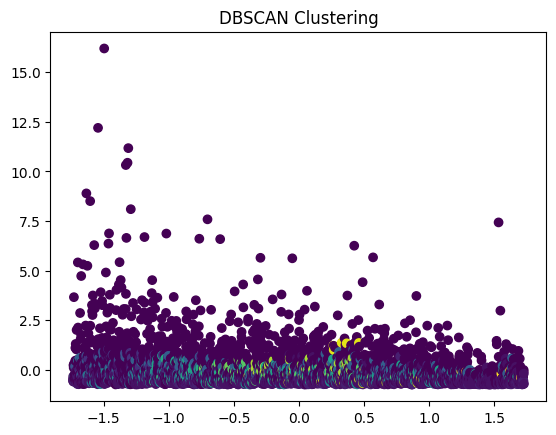

In [21]:
# Step 4: Cluster Analysis and Interpretation
print("Silhouette Score for DBSCAN:", silhouette_score(data_scaled, dbscan_labels, metric='euclidean') if len(set(dbscan_labels)) > 1 else "N/A")

# Step 5: Visualization
# Visualize K-Means
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis', label='K-Means Clusters')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis', label='Hierarchical Clusters')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize DBSCAN
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis', label='DBSCAN Clusters')
plt.title('DBSCAN Clustering')
plt.show()


In [22]:
# Save results to a CSV
results = pd.DataFrame({
    'K-Means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels
})
results.to_csv('clustering_results.csv', index=False)